<a href="https://colab.research.google.com/github/realhanzalah/kmeans/blob/main/KMeansClients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
from google.colab import files
uploaded = files.upload()

Saving contactsAV.csv to contactsAV (3).csv


In [15]:
df = pd.read_csv('contactsAV (3).csv', usecols = ['Company','Intent','Employees'], low_memory = True)
df.head()

,Company,Intent,Employees
0,Balfor Recruitment Group,6,70
1,Socialcare2Recruit Ltd,3,7
2,Confidential,3,22000
3,White Label Studio,5,29
4,Culture Recruitment Group - USA,2,4


Text(0, 0.5, 'Employees')

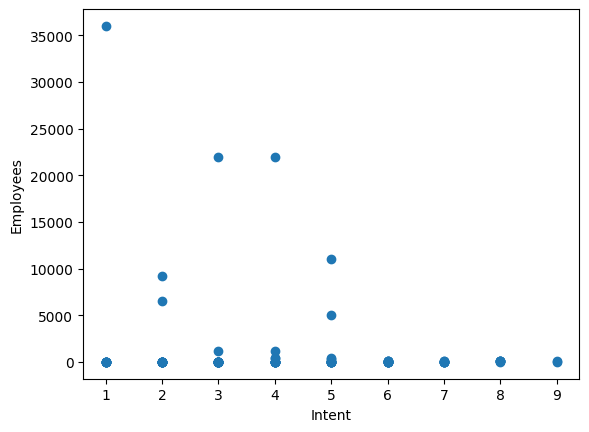

In [16]:
plt.scatter(df['Intent'],df['Employees'])
plt.xlabel('Intent')
plt.ylabel('Employees')

In [17]:
km = KMeans(n_clusters=3)


In [18]:
y_predicted = km.fit_predict(df[['Intent','Employees']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [19]:
df['cluster']=y_predicted
df.head()

,Company,Intent,Employees,cluster
0,Balfor Recruitment Group,6,70,0
1,Socialcare2Recruit Ltd,3,7,0
2,Confidential,3,22000,1
3,White Label Studio,5,29,0
4,Culture Recruitment Group - USA,2,4,0


In [20]:
km.cluster_centers_

array([[4.25806452e+00, 6.36129032e+01],
       [2.66666667e+00, 2.66666667e+04],
       [3.50000000e+00, 7.92500000e+03]])

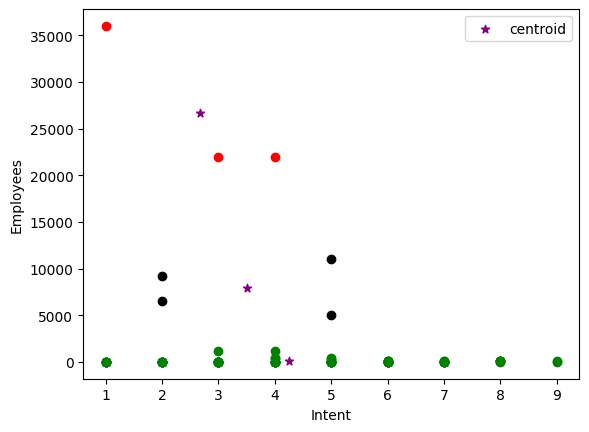

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Intent,df1['Employees'],color='green')
plt.scatter(df2.Intent,df2['Employees'],color='red')
plt.scatter(df3.Intent,df3['Employees'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Intent')
plt.ylabel('Employees')
plt.legend()

Elbow Plot section to determine the optimal number of k in finding accurate clusters.

In [22]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Intent','Employees']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
sse

[2402188322.2,
 392602964.21993124,
 155591380.20430097,
 24924709.370967746,
 6002209.37096774,
 3362693.1648351643,
 1742688.6648351648,
 617684.1648351649,
 86351.35632183908]

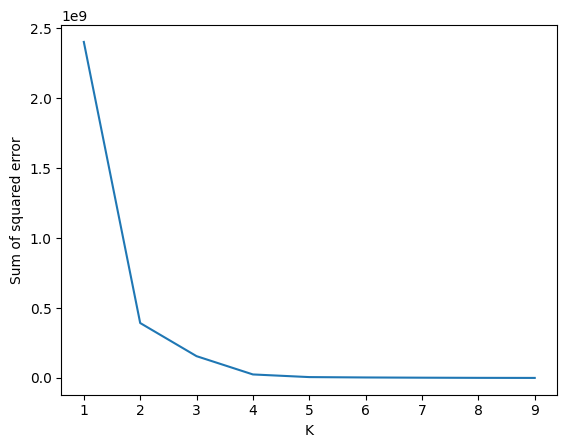

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)